In [2]:
import sys
import os
import SimpleITK
import numpy
import matplotlib.pyplot
import subprocess
import scipy.stats
sys.path.append(os.path.join(os.path.expanduser('~'),'software','src','nixSuite','wrapper'))
import nixWrapper
nixWrapper.loadLibrary('labkeyInterface')
import labkeyInterface
net=labkeyInterface.labkeyInterface()
fconfig=os.path.join(os.path.expanduser('~'),'.labkey','network.json')
net.init(fconfig)
net.getCSRF()
import labkeyFileBrowser
sys.path.append(os.getcwd())
import downloadPatient
fb=labkeyFileBrowser.labkeyFileBrowser(net)
project='dinamic_spect/Patients'
locDir=os.path.join(os.path.expanduser('~'),'temp','dynamicSPECT')
import labkeyDatabaseBrowser
db=labkeyDatabaseBrowser.labkeyDB(net)
ds=db.selectRows(project,'study','Summary',[])
patients=[row['aliasID'] for row in ds['rows']]

/usr/lib/python3/dist-packages/urllib3/connection.py:391: SubjectAltNameWarning: Certificate for merlin.fmf.uni-lj.si has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/urllib3/urllib3/issues/497 for details.)
  warnings.warn(


User: andrej studen CSRF: 14c633f5ee0ecbc6da0fd1343cb5a5e6


In [53]:
def getValues(db,project,p,nclass,option,sigma2,var):
    idFilter={'variable':'aliasID','value':p,'oper':'eq'}
    cFilter={'variable':'nclass','value':str(nclass),'oper':'eq'}
    oFilter={'variable':'option','value':option,'oper':'eq'}    
    sFilter={'variable':'sigma2','value':str(sigma2),'oper':'eq'}    
    ds=db.selectRows(project,'study','Summary',[idFilter,cFilter,oFilter,sFilter])
    nr=len(ds['rows'])
    k1=numpy.zeros(nr)
    for r in ds['rows']:
        k1[int(r['regionId'])]=60*r[var]
    return k1

def getAllValues(db,project,patientList,nclass,option,sigma2,var):
    for p in patientList:
        try:
            k1=numpy.append(k1,getValues(db,project,p,nclass,option,sigma2,var))
        except UnboundLocalError:
            k1=getValues(db,project,p,nclass,option,sigma2,var)
    return k1

def plotSummary(db,project,patientList,option,var):
    fig, ax = matplotlib.pyplot.subplots(3,3,figsize=(20,10))
    i=0
    for s in [0.1,1.0,4.0]:
        k1m=getAllValues(db,project,patientList,16,'D',s,'mean')
        j=0
        for c in [10,20,30]:
            k1c=getAllValues(db,project,patientList,c,option,0.1,var)
            select=[all(tup) for tup in zip(k1m<1,k1c<1)]
            k1mp=k1m[select]
            k1c=k1c[select]
            ax[i,j].scatter(k1mp,k1c)
            fr,fp=scipy.stats.pearsonr(k1mp,k1c)
            fy=max(k1c)
            ax[i,j].text(0.01,0.9*fy,'[{}]/{:.2f}'.format(c,s),fontsize='x-large')
            ax[i,j].text(0.01,0.8*fy,'R2={:.2f}'.format(fr*fr),fontsize='x-large')
            j+=1
        i+=1
    matplotlib.pyplot.show()

/usr/lib/python3/dist-packages/urllib3/connection.py:391: SubjectAltNameWarning: Certificate for merlin.fmf.uni-lj.si has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/urllib3/urllib3/issues/497 for details.)
  warnings.warn(
/usr/lib/python3/dist-packages/urllib3/connection.py:391: SubjectAltNameWarning: Certificate for merlin.fmf.uni-lj.si has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/urllib3/urllib3/issues/497 for details.)
  warnings.warn(


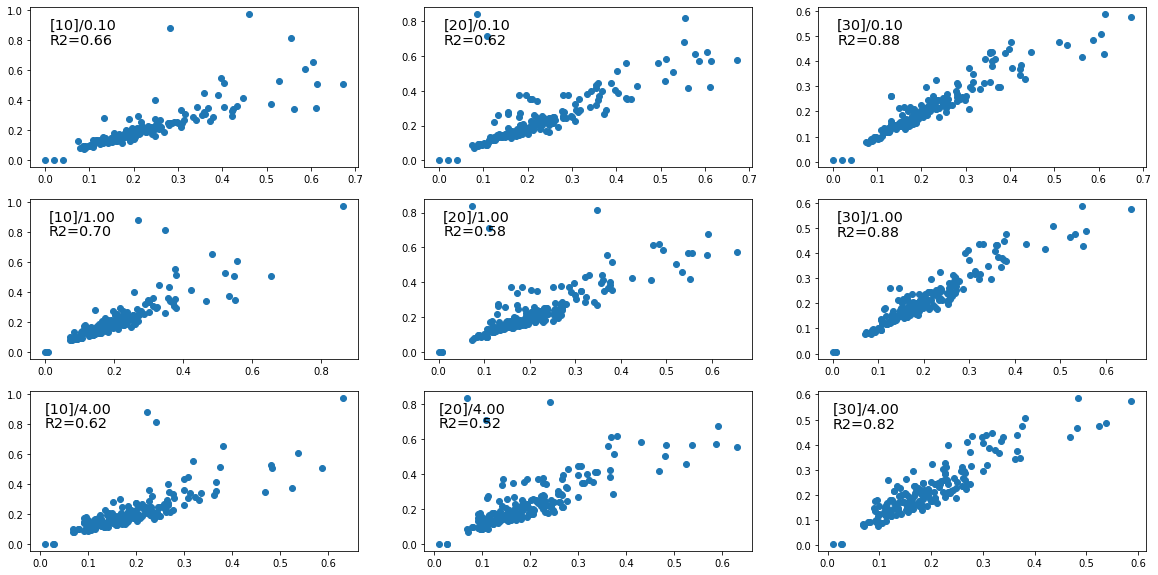

In [51]:
patientList=list(set(patients))
plotSummary(db,project,patientList,'W','mean')

/usr/lib/python3/dist-packages/urllib3/connection.py:391: SubjectAltNameWarning: Certificate for merlin.fmf.uni-lj.si has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/urllib3/urllib3/issues/497 for details.)
  warnings.warn(
/usr/lib/python3/dist-packages/urllib3/connection.py:391: SubjectAltNameWarning: Certificate for merlin.fmf.uni-lj.si has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/urllib3/urllib3/issues/497 for details.)
  warnings.warn(


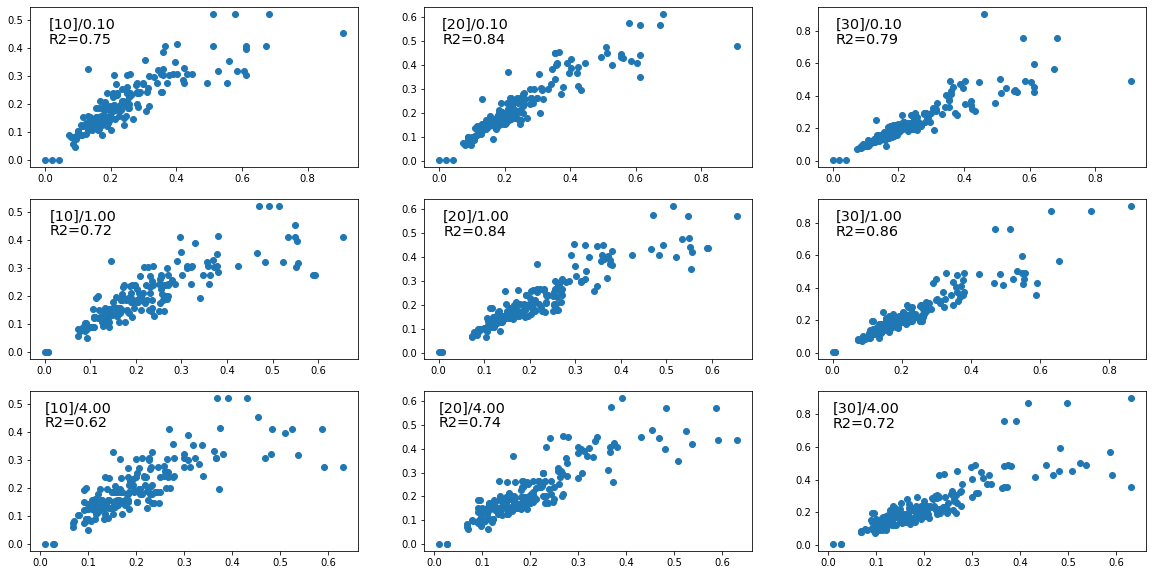

In [54]:
patientList=list(set(patients))
plotSummary(db,project,patientList,'M','mean')